# <center> Vhicle dataset car detail</center>

## the factor affecting price of cars 

### first let's import all packages that we use on this project

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
#After executing the below command restart the kernel and run all cells.
!pip3 install scikit-learn --upgrade --user


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| make          | A notation for a house                                                                                      |
| model         | model of the car                                                                                            |
| price         | Price is prediction target                                                                                  |
| Year          | production year                                                                                             |
| kilometer     | tottal killometrs  travled                                                                                  |
| Fuel Type     | type of fule consumed by the car                                                                            |
| Transmission  | Square footage of the lot                                                                                   |
| Location      | current location of the car                                                                                 |
| Color         | House which has a view to a waterfront                                                                      |
| Owner         | Has been viewed                                                                                             |
| Seller Type   | How good the condition is overall                                                                           |
| Engine        | overall grade given to the housing unit, based on King County grading system                                |
| Max Power     | Square footage of house apart from basement                                                                 |
| Max Torque    | Square footage of the basement                                                                              |
| Drivetrain    | Built Year                                                                                                  |
| Length        | Year when house was renovated                                                                               |
| Width         | Zip code                                                                                                    |
| Height        | Latitude coordinate                                                                                         |
|Fuel Tank      |



# 1,  importing the dataset

In [5]:
#reading and loading csv file
df = pd.read_csv("car details v4 - Copy.csv")
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [6]:
#checking the data type of each column
df.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

In [9]:
# the 'Year' column converted to a datetime format 
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [11]:
#descriptive stastics
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016-06-04 19:16:45.342398976,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
min,4.900000e+04,1988-01-01 00:00:00,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014-01-01 00:00:00,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017-01-01 00:00:00,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019-01-01 00:00:00,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022-01-01 00:00:00,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000
std,2.419881e+06,NaN,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198


### unique values in ['Make', 'Model', 'Fuel Type', 'Transmission', 'Color']

In [13]:
# List of categorical columns
categorical_columns = ['Make', 'Model', 'Fuel Type', 'Transmission', 'Color']

# Count unique values in each categorical column
for column in categorical_columns:
    unique_values = df[column].nunique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Make': 33
Unique values in column 'Model': 1050
Unique values in column 'Fuel Type': 9
Unique values in column 'Transmission': 2
Unique values in column 'Color': 17


In [16]:
print(df.isnull().sum())

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


### dealing with missing value

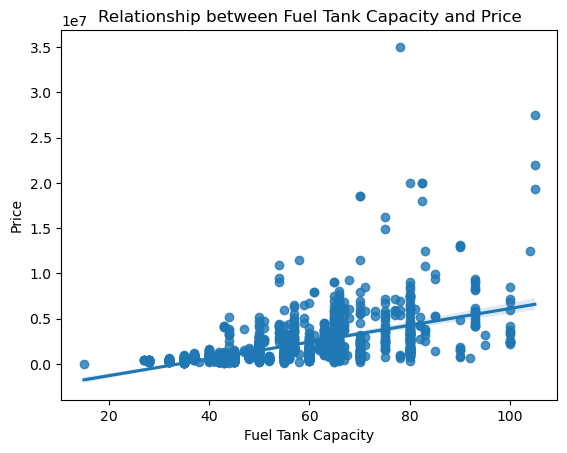

In [ ]:
# Fuel Tank Capacity as potential predictor variable of price
sns.regplot(x="Fuel Tank Capacity", y="Price", data=df)
# plt.gca().set_aspect('')

# get the current Axes object
ax = plt.gca()

# automatically adjust the x-axis and y-axis limits
ax.autoscale()

# set the plot title
plt.title('Relationship between Fuel Tank Capacity and Price')

# display the plot
plt.show()

In [19]:
df[['Fuel Tank Capacity', 'Price']].corr()

,Fuel Tank Capacity,Price
Fuel Tank Capacity,1.000000,0.584631
Price,0.584631,1.000000


In [ ]:
# A correlation coefficient of 0.58 indicates a moderate positive linear relationship between Fuel Tank Capacity and Price. 
# This suggests that as the Fuel Tank Capacity increases, the Price tends to increase as well, but the relationship is not perfect.

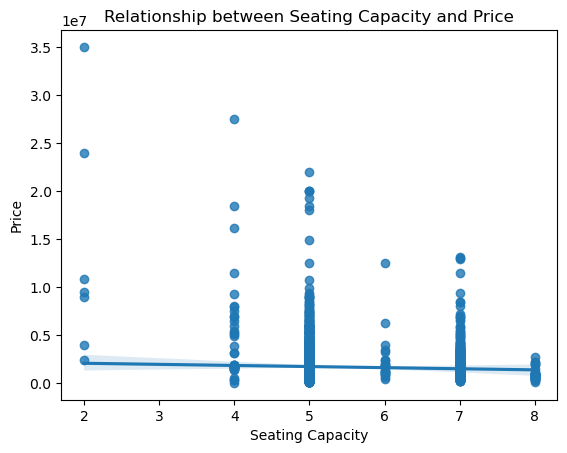

In [ ]:
# Fuel Tank Capacity as potential predictor variable of price
sns.regplot(x="Seating Capacity", y="Price", data=df)
# plt.gca().set_aspect('')

# get the current Axes object
ax = plt.gca()

# automatically adjust the x-axis and y-axis limits
ax.autoscale()

# set the plot title
plt.title('Relationship between Seating Capacity and Price')

# display the plot
plt.show()